In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict,RandomizedSearchCV

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
df=pd.read_csv("/content/processed_dataset.csv")
df.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Global_active_power,Day,Month,Year,Hour
0,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,2.878,16,12,2006,21
1,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,1.848,16,12,2006,21
2,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,3.226,16,12,2006,21
3,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482,1.948,16,12,2006,21
4,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052,1.872,16,12,2006,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739108 entries, 0 to 1739107
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_reactive_power  float64
 1   Voltage                float64
 2   Global_intensity       float64
 3   Sub_metering_2         float64
 4   Sub_metering_3         float64
 5   Daily_avg              float64
 6   Rolling_mean           float64
 7   Global_active_power    float64
 8   Day                    int64  
 9   Month                  int64  
 10  Year                   int64  
 11  Hour                   int64  
dtypes: float64(8), int64(4)
memory usage: 159.2 MB


In [ ]:
features=df.drop('Global_active_power',axis=1)
target=df["Global_active_power"]
features.head()

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Day,Month,Year,Hour
0,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,16,12,2006,21
1,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,16,12,2006,21
2,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,16,12,2006,21
3,-1.161788,-0.989425,1.857407,-0.555626,1.392828,4.845549,3.051482,16,12,2006,21
4,-1.161788,-0.964760,1.720987,-0.555626,1.515661,4.845549,3.015052,16,12,2006,21


In [ ]:
target.head()

,Global_active_power
0,2.878
1,1.848
2,3.226
3,1.948
4,1.872


# Linear regression

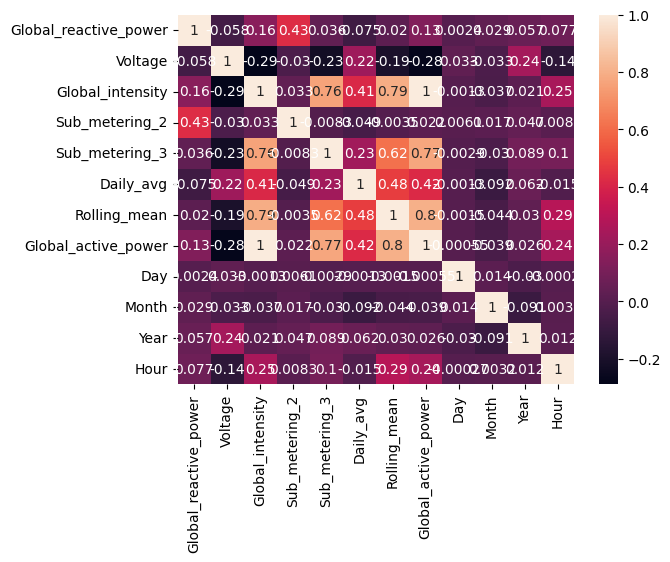

In [ ]:
# correlation between values
corr=df.select_dtypes('number').corr()
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
# Multi colinearity check
vif_df=pd.DataFrame()
vif_df["features"]=features.columns
vif_df["VIF"]=[variance_inflation_factor(features.values,i) for i in range(features.shape[1])]
vif_df

,features,VIF
0,Global_reactive_power,1.338466
1,Voltage,1.293370
2,Global_intensity,4.763692
3,Sub_metering_2,1.230692
4,Sub_metering_3,2.577409
5,Daily_avg,1.670585
6,Rolling_mean,3.152970
7,Day,4.193830
8,Month,4.685828
9,Year,10.678168


In [ ]:
min_vif=vif_df[vif_df["VIF"]<10]
min_vif

,features,VIF
0,Global_reactive_power,1.338466
1,Voltage,1.293370
2,Global_intensity,4.763692
3,Sub_metering_2,1.230692
4,Sub_metering_3,2.577409
5,Daily_avg,1.670585
6,Rolling_mean,3.152970
7,Day,4.193830
8,Month,4.685828
10,Hour,4.078836


In [ ]:
features_vif=features[min_vif["features"]]
features_vif.head(3)

,Global_reactive_power,Voltage,Global_intensity,Sub_metering_2,Sub_metering_3,Daily_avg,Rolling_mean,Day,Month,Hour
0,-0.533979,-1.426356,3.085182,-0.555626,1.392828,4.845549,3.125250,16,12,21
1,0.010123,-0.926000,1.652778,-0.555626,1.515661,4.845549,3.087271,16,12,21
2,-1.161788,-1.415785,3.494441,-0.555626,1.515661,4.845549,3.086202,16,12,21


In [ ]:
# building the model

scoring=["r2","neg_mean_squared_error","neg_mean_absolute_error"]

linear_model=LinearRegression()
linear_pred=cross_val_predict(linear_model,features,target,cv=8)

In [ ]:
linear_pred

array([3.03779376, 2.03730763, 3.33496843, ..., 0.91321653, 0.91275352,
       0.91219337])

In [ ]:
r2_linear=r2_score(target,linear_pred)
mse_linear=mean_squared_error(target,linear_pred)
mae_linear=mean_absolute_error(target,linear_pred)
print(f'r2 score:{r2_linear}\nmae score:{mae_linear}\nmse score:{mse_linear}')

r2 score:0.9978305422148366
mae score:0.021977152355973965
mse score:0.001093933596623058


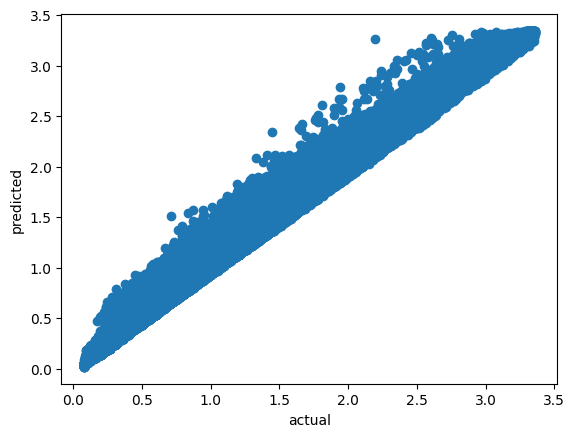

In [ ]:
plt.scatter(target,linear_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

# Random Forest

In [ ]:
rf_model=RandomForestRegressor()

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
features_sample=features.sample(frac=0.2,random_state=42)
target_sample=target.loc[features_sample.index]
len(features_sample)

347822

In [ ]:
forest_grid=RandomizedSearchCV(rf_model,param_grid,cv=3,scoring="r2",n_iter=10,verbose=1,n_jobs=-1)

In [ ]:
forest_grid.fit(features_sample,target_sample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   scoring='r2', verbose=1)

In [ ]:
# best model params
forest_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [ ]:
# model r2 score
forest_grid.best_score_

np.float64(0.9927631065506176)

In [ ]:
forest_pred=forest_grid.predict(features)

In [ ]:
r2_forest=r2_score(target,forest_pred)
mse_forest=mean_squared_error(target,forest_pred)
mae_forest=mean_absolute_error(target,forest_pred)
print(f'r2 score:{r2_forest}\nmae score:{mae_forest}\nmse score:{mse_forest}')

r2 score:0.9924941895389423
mae score:0.03816667599583548
mse score:0.0037847513279072246


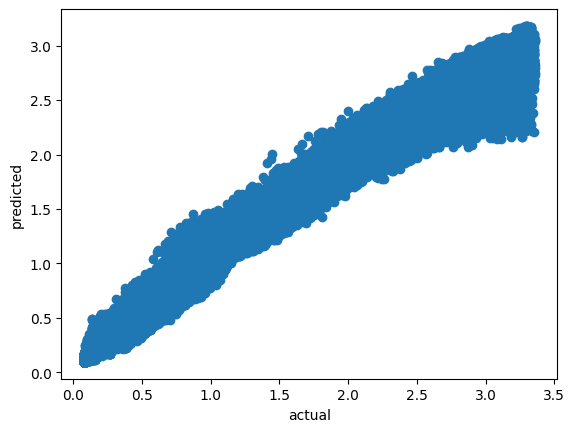

In [ ]:
plt.scatter(target,forest_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()